In [100]:
import numpy as np
import pandas as pd
import seaborn as sns

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/final_batting_2023.csv')

In [103]:
df.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year
0,1,Shubman GillGT,17,17,2,890,129,59.33,564,157.80,3,4,85,33,2023
1,2,Faf Du PlessisRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36,2023
2,3,Devon ConwayCSK,16,15,2,672,92*,51.69,481,139.70,0,6,77,18,2023
3,4,Virat KohliRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023
4,5,Yashasvi JaiswalRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26,2023


In [104]:
df.tail()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year
2336,146,Paidikalva VijaykumarDEC,9,2,2,1,1*,0.00,1,100.0,0,0,0,0,2008
2337,147,Abdur RazzakRCB,1,1,1,0,0*,0.00,2,0.0,0,0,0,0,2008
2338,148,Abhinav MukundCSK,2,1,0,0,0*,0.00,1,0.0,0,0,0,0,2008
2339,149,Lakshmipathy BalajiCSK,9,1,0,0,0*,0.00,4,0.0,0,0,0,0,2008
2340,150,Munaf PatelRR,15,2,2,0,0*,0.00,1,0.0,0,0,0,0,2008


In [105]:
df.shape

(2341, 15)

##**Renaming POS column to Position**

In [106]:
df.rename(columns = {'POS':'Postion'}, inplace = True)

In [107]:
df.head()

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year
0,1,Shubman GillGT,17,17,2,890,129,59.33,564,157.80,3,4,85,33,2023
1,2,Faf Du PlessisRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36,2023
2,3,Devon ConwayCSK,16,15,2,672,92*,51.69,481,139.70,0,6,77,18,2023
3,4,Virat KohliRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023
4,5,Yashasvi JaiswalRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26,2023


In [108]:
df.columns

Index(['Postion', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF',
       'SR', '100', '50', '4s', '6s', 'year'],
      dtype='object')

##**Adding Team Column**

In [109]:
import re
pattern = r'([A-Z]+)$'

#Add a column Team
df['Team'] = df['Player'].str.extract(pattern)

#Seperate Player from Team Name
df['Player']=df['Player'].str.replace(pattern, '')
#df['Player']=df['Player'].str.replace(pattern, '').str.strip()

<ipython-input-109-bbfb4602eaf7>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Player']=df['Player'].str.replace(pattern, '')


In [110]:
df.head()

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team
0,1,Shubman Gill,17,17,2,890,129,59.33,564,157.80,3,4,85,33,2023,GT
1,2,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,2023,RCB
2,3,Devon Conway,16,15,2,672,92*,51.69,481,139.70,0,6,77,18,2023,CSK
3,4,Virat Kohli,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023,RCB
4,5,Yashasvi Jaiswal,14,14,1,625,124,48.08,382,163.61,1,5,82,26,2023,RR


In [111]:
df.shape

(2341, 16)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Postion  2341 non-null   int64  
 1   Player   2341 non-null   object 
 2   Mat      2341 non-null   int64  
 3   Inns     2341 non-null   int64  
 4   NO       2341 non-null   int64  
 5   Runs     2341 non-null   int64  
 6   HS       2341 non-null   object 
 7   Avg      2341 non-null   object 
 8   BF       2341 non-null   int64  
 9   SR       2341 non-null   float64
 10  100      2341 non-null   int64  
 11  50       2341 non-null   int64  
 12  4s       2341 non-null   int64  
 13  6s       2341 non-null   int64  
 14  year     2341 non-null   int64  
 15  Team     2341 non-null   object 
dtypes: float64(1), int64(11), object(4)
memory usage: 292.8+ KB


##**Clean Player Name by adding a new Column**

In [117]:
clean_player_name = lambda x: re.sub(r'[^a-zA-Z\s]', '', x).replace(' ', '').lower()
df['Unique'] = df['Player'].apply(clean_player_name)

In [118]:
df.head()

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team,Unique
0,1,Shubman Gill,17,17,2,890,129,59.33,564,157.80,3,4,85,33,2023,GT,shubmangill
1,2,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,2023,RCB,fafduplessis
2,3,Devon Conway,16,15,2,672,92*,51.69,481,139.70,0,6,77,18,2023,CSK,devonconway
3,4,Virat Kohli,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023,RCB,viratkohli
4,5,Yashasvi Jaiswal,14,14,1,625,124,48.08,382,163.61,1,5,82,26,2023,RR,yashasvijaiswal


In [119]:
df.sample(5)

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team,Unique
1735,146,Dwaraka Ravi Teja,2,2,0,4,4,2.00,4,100.00,0,0,1,0,2012,DEC,dwarakaraviteja
2222,32,Sachin Tendulkar,7,7,1,188,65,31.33,177,106.21,0,1,26,2,2008,MI,sachintendulkar
1927,20,Chris Gayle,9,9,0,292,88,32.44,184,158.69,0,2,30,16,2010,KKR,chrisgayle
1152,118,Mitchell Johnson,3,3,1,5,4,2.50,14,35.71,0,0,0,0,2016,PBKS,mitchelljohnson
1346,47,Steve Smith,10,7,3,147,48*,36.75,110,133.63,0,0,13,4,2014,RR,stevesmith


##**Player data**

In [120]:
player_data=df[df['Unique']=="viratkohli"]

In [121]:
player_data

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team,Unique
3,4,Virat Kohli,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023,RCB,viratkohli
187,22,Virat Kohli,16,16,1,341,73,22.73,294,115.98,0,2,32,8,2022,RCB,viratkohli
339,12,Virat Kohli,15,15,1,405,72*,28.92,339,119.46,0,3,43,9,2021,RCB,viratkohli
485,9,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11,2020,RCB,viratkohli
617,8,Virat Kohli,14,14,0,464,100,33.14,328,141.46,1,2,46,13,2019,RCB,viratkohli
760,7,Virat Kohli,14,14,3,530,92*,48.18,381,139.10,0,4,52,18,2018,RCB,viratkohli
914,23,Virat Kohli,10,10,0,308,64,30.80,252,122.22,0,4,23,11,2017,RCB,viratkohli
1035,1,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,2016,RCB,viratkohli
1175,5,Virat Kohli,16,16,5,505,82*,45.90,386,130.82,0,3,35,23,2015,RCB,viratkohli
1318,19,Virat Kohli,14,14,1,359,73,27.61,294,122.10,0,2,23,16,2014,RCB,viratkohli


In [122]:
player_data.shape

(16, 17)

In [123]:
player_data = player_data.sort_values(by='Runs',ascending=False)
player_data

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team,Unique
1035,1,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,2016,RCB,viratkohli
3,4,Virat Kohli,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023,RCB,viratkohli
1434,3,Virat Kohli,16,16,2,634,99,45.28,457,138.73,0,6,64,22,2013,RCB,viratkohli
1748,2,Virat Kohli,16,16,4,557,71,46.41,460,121.08,0,4,55,16,2011,RCB,viratkohli
760,7,Virat Kohli,14,14,3,530,92*,48.18,381,139.10,0,4,52,18,2018,RCB,viratkohli
1175,5,Virat Kohli,16,16,5,505,82*,45.90,386,130.82,0,3,35,23,2015,RCB,viratkohli
485,9,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11,2020,RCB,viratkohli
617,8,Virat Kohli,14,14,0,464,100,33.14,328,141.46,1,2,46,13,2019,RCB,viratkohli
339,12,Virat Kohli,15,15,1,405,72*,28.92,339,119.46,0,3,43,9,2021,RCB,viratkohli
1605,16,Virat Kohli,16,15,2,364,73*,28.00,326,111.65,0,2,33,9,2012,RCB,viratkohli


In [124]:
df[df['Unique']=="viratkohli"].describe()

,Postion,Mat,Inns,NO,Runs,BF,SR,100,50,4s,6s,year
count,16.000000,16.000000,16.000000,16.000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,12.875000,14.812500,14.312500,2.125,453.937500,349.12500,127.376250,0.437500,3.125000,40.187500,14.625000,2015.500000
std,9.999167,1.641899,1.701715,1.500,192.738326,119.16648,13.752002,1.093542,1.962142,19.100502,8.114801,4.760952
min,1.000000,10.000000,10.000000,0.000,165.000000,157.00000,105.090000,0.000000,0.000000,18.000000,4.000000,2008.000000
25%,4.750000,14.000000,13.750000,1.000,332.750000,283.50000,118.590000,0.000000,2.000000,23.000000,9.000000,2011.750000
50%,10.500000,15.500000,14.500000,2.000,434.500000,333.50000,122.160000,0.000000,3.000000,34.000000,12.500000,2015.500000
75%,19.000000,16.000000,16.000000,3.250,536.750000,403.75000,139.280000,0.000000,4.000000,52.750000,16.500000,2019.250000
max,38.000000,16.000000,16.000000,5.000,973.000000,640.00000,152.030000,4.000000,7.000000,83.000000,38.000000,2023.000000


##Player Stats Visualization

In [125]:
df.head(3)

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team,Unique
0,1,Shubman Gill,17,17,2,890,129,59.33,564,157.80,3,4,85,33,2023,GT,shubmangill
1,2,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,2023,RCB,fafduplessis
2,3,Devon Conway,16,15,2,672,92*,51.69,481,139.70,0,6,77,18,2023,CSK,devonconway


In [126]:
player_data.head(3)

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team,Unique
1035,1,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,83,38,2016,RCB,viratkohli
3,4,Virat Kohli,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023,RCB,viratkohli
1434,3,Virat Kohli,16,16,2,634,99,45.28,457,138.73,0,6,64,22,2013,RCB,viratkohli


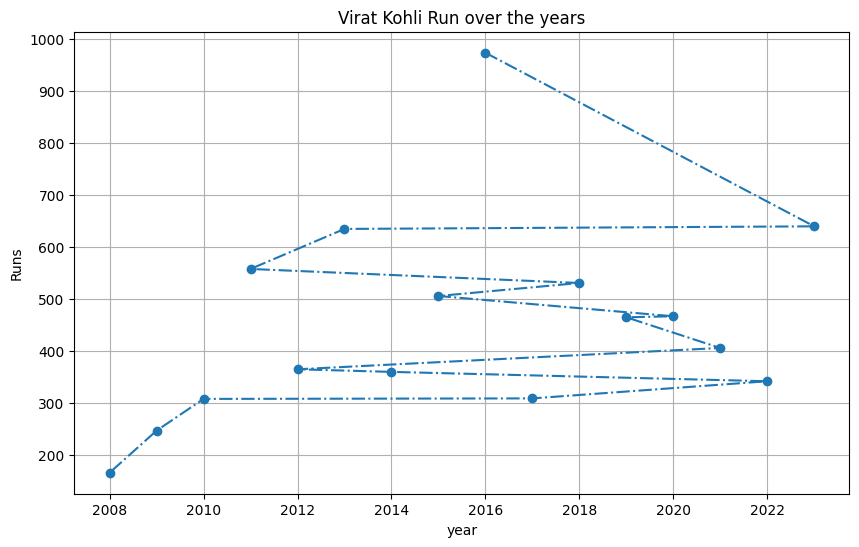

In [145]:
plt.figure(figsize=(10,6))
plt.xlabel("year")
plt.ylabel("Runs")
plt.title("Virat Kohli Run over the years")
plt.plot(player_data['year'], player_data['Runs'], marker='o',linestyle='-.')
plt.grid(True)
plt.show()

In [146]:
# Extract the 'Year' and 'Runs' columns for the player
years = player_data['year']
runs = player_data['Runs']

In [147]:
import matplotlib.pyplot as plt

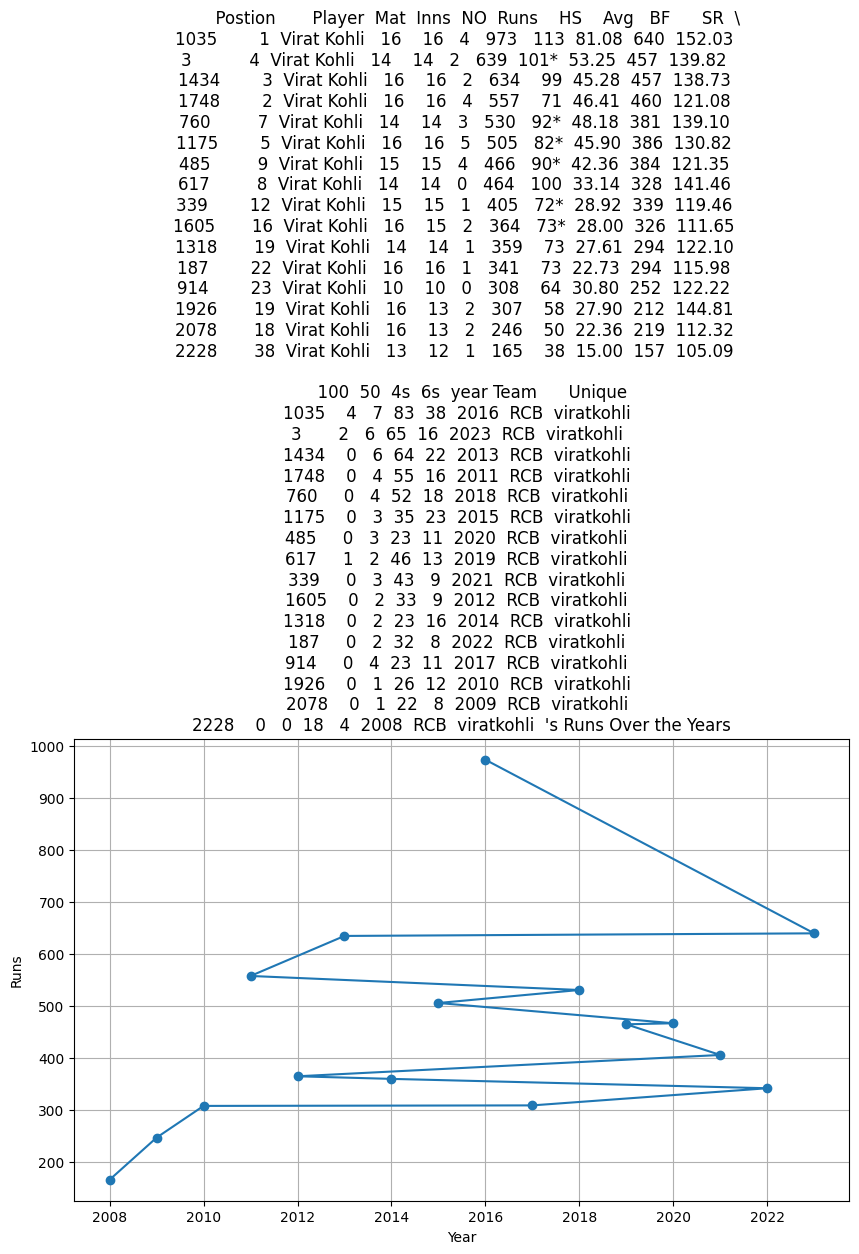

In [148]:
# Create a line chart to visualize runs over the years
plt.figure(figsize=(10, 6))
plt.plot(years, runs, marker='o', linestyle='-')
plt.title(f"{player_data}'s Runs Over the Years")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.grid(True)

## Converting Average column to numeric

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Postion  2341 non-null   int64  
 1   Player   2341 non-null   object 
 2   Mat      2341 non-null   int64  
 3   Inns     2341 non-null   int64  
 4   NO       2341 non-null   int64  
 5   Runs     2341 non-null   int64  
 6   HS       2341 non-null   object 
 7   Avg      2313 non-null   float64
 8   BF       2341 non-null   int64  
 9   SR       2341 non-null   float64
 10  100      2341 non-null   int64  
 11  50       2341 non-null   int64  
 12  4s       2341 non-null   int64  
 13  6s       2341 non-null   int64  
 14  year     2341 non-null   int64  
 15  Team     2341 non-null   object 
 16  Unique   2341 non-null   object 
dtypes: float64(2), int64(11), object(4)
memory usage: 311.0+ KB


In [154]:
df['Avg']=pd.to_numeric(df['Avg'],errors='coerce')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Postion  2341 non-null   int64  
 1   Player   2341 non-null   object 
 2   Mat      2341 non-null   int64  
 3   Inns     2341 non-null   int64  
 4   NO       2341 non-null   int64  
 5   Runs     2341 non-null   int64  
 6   HS       2341 non-null   object 
 7   Avg      2313 non-null   float64
 8   BF       2341 non-null   int64  
 9   SR       2341 non-null   float64
 10  100      2341 non-null   int64  
 11  50       2341 non-null   int64  
 12  4s       2341 non-null   int64  
 13  6s       2341 non-null   int64  
 14  year     2341 non-null   int64  
 15  Team     2341 non-null   object 
 16  Unique   2341 non-null   object 
dtypes: float64(2), int64(11), object(4)
memory usage: 311.0+ KB


##**Aggregating the data**

In [174]:
agg_data = df.groupby('Unique').agg({
    'Mat': 'sum',
    'Runs': 'sum',
    'Inns': 'sum',
    'NO': 'sum',
    'HS':'max',
    'BF':'sum',
    'SR':'mean',
    'Avg':'mean',
    '50':'sum',
    '100': 'sum',
    '4s':'sum',
    '6s':'sum',
}).reset_index()

In [175]:
agg_data.head()

,Unique,Mat,Runs,Inns,NO,HS,BF,SR,Avg,50,100,4s,6s
0,aakashchopra,7,53,6,0,24,71,69.325000,9.700000,0,0,7,0
1,aaronfinch,92,2091,90,7,88*,1631,119.692727,22.634545,15,0,214,78
2,abdevilliers,169,4697,157,36,90*,3048,147.285385,37.075385,37,2,374,239
3,abdulbasith,1,1,1,1,1*,1,100.000000,NaN,0,0,0,0
4,abdulsamad,34,395,28,8,4,287,121.877500,19.695000,0,0,22,25


In [176]:
agg_data.tail()

,Unique,Mat,Runs,Inns,NO,HS,BF,SR,Avg,50,100,4s,6s
618,yudhvirsingh,3,1,2,0,1,2,50.000000,0.500000,0,0,0,0
619,yusufpathan,174,3204,154,44,72,2241,138.135833,30.297500,13,1,262,158
620,yuvrajsingh,132,2750,126,15,83,2120,128.200000,24.500909,13,0,217,149
621,yuzvendrachahal,117,37,20,13,8*,86,52.545000,1.666250,0,0,0,0
622,zaheerkhan,91,117,32,18,7*,141,85.707500,9.000000,0,0,11,2


In [177]:
agg_data.sample(5)

,Unique,Mat,Runs,Inns,NO,HS,BF,SR,Avg,50,100,4s,6s
447,rinkusingh,31,725,29,9,67*,510,120.118000,26.160000,4,0,54,38
360,munafpatel,32,37,10,5,4*,33,51.730000,3.750000,0,0,5,0
523,shubmangill,91,2790,88,14,96,2081,132.896667,37.081667,18,3,273,80
316,marchantdelange,1,1,1,0,1,2,50.000000,1.000000,0,0,0,0
206,harshitrana,2,2,2,1,2,2,100.000000,2.000000,0,0,0,0


##Rounding-of Avg and Strike upto 2 decimal places

In [178]:
agg_data[['SR', 'Avg']] =agg_data[['SR','Avg']].round(decimals=2)

In [179]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unique  623 non-null    object 
 1   Mat     623 non-null    int64  
 2   Runs    623 non-null    int64  
 3   Inns    623 non-null    int64  
 4   NO      623 non-null    int64  
 5   HS      623 non-null    object 
 6   BF      623 non-null    int64  
 7   SR      623 non-null    float64
 8   Avg     616 non-null    float64
 9   50      623 non-null    int64  
 10  100     623 non-null    int64  
 11  4s      623 non-null    int64  
 12  6s      623 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 63.4+ KB


In [180]:
agg_data.isnull().sum()

Unique    0
Mat       0
Runs      0
Inns      0
NO        0
HS        0
BF        0
SR        0
Avg       7
50        0
100       0
4s        0
6s        0
dtype: int64

In [181]:
agg_data.sample(10)

,Unique,Mat,Runs,Inns,NO,HS,BF,SR,Avg,50,100,4s,6s
235,javonsearles,4,8,2,1,6*,6,133.33,8.00,0,0,0,1
327,mayankagarwal,123,2597,117,4,99*,1943,125.88,20.71,13,1,255,97
41,amankhan,12,115,10,1,51,104,137.78,9.38,1,0,8,6
447,rinkusingh,31,725,29,9,67*,510,120.12,26.16,4,0,54,38
250,jonnybairstow,39,1291,39,3,97,905,142.59,37.83,9,1,133,55
22,adityatare,35,339,28,4,8,273,104.64,11.64,1,0,40,11
330,michaelbracewell,5,58,4,2,26,47,123.40,29.00,0,0,6,1
565,timpaine,2,10,2,0,8,26,38.46,5.00,0,0,0,0
303,lukewright,6,106,6,1,44,60,176.66,21.20,0,0,16,3
542,sudeeptyagi,6,3,1,1,3*,4,75.00,0.00,0,0,0,0


##Aggregating data for an individual player

In [183]:
agg_data[agg_data['Unique']=='viratkohli']

,Unique,Mat,Runs,Inns,NO,HS,BF,SR,Avg,50,100,4s,6s
597,viratkohli,237,7263,229,34,99,5586,127.38,37.43,50,7,643,234


##Highest Run Scorers

In [190]:
maximum_run=df.groupby('Unique')['Runs'].sum().sort_values(ascending=False)

In [193]:
top_10_run_scorers = maximum_run.head(10)
top_10_run_scorers

Unique
viratkohli       7263
shikhardhawan    6617
davidwarner      6234
rohitsharma      6211
sureshraina      5528
msdhoni          5082
chrisgayle       4965
robinuthappa     4952
abdevilliers     4697
ajinkyarahane    4400
Name: Runs, dtype: int64

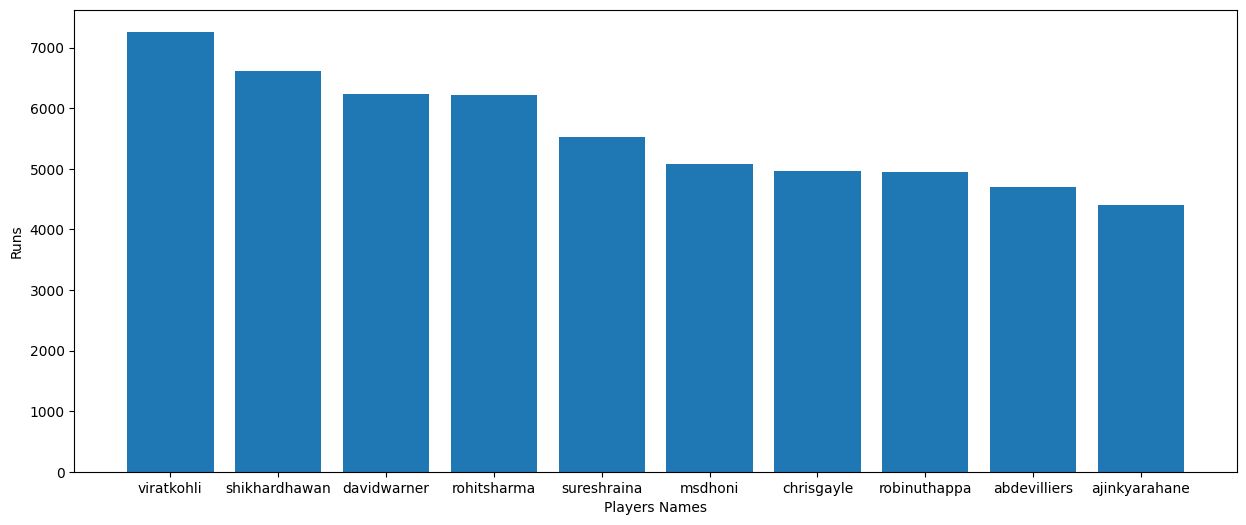

In [195]:
plt.figure(figsize=(15,6))
plt.bar(top_10_run_scorers.index, top_10_run_scorers.values)
plt.xlabel('Players Names')
plt.ylabel('Runs')
plt.show()

##Maximum matches played by a team

In [196]:
maximum_matches=df.groupby('Team')['Mat'].sum().sort_values(ascending=False)

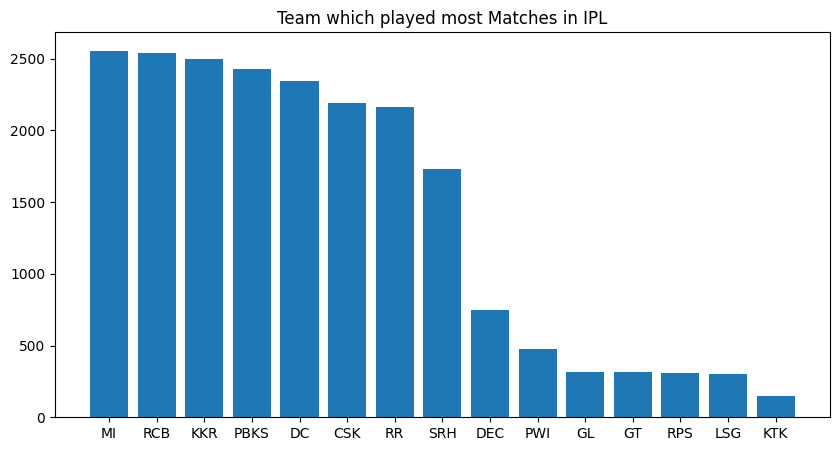

In [197]:
plt.figure(figsize=(10,5))
plt.bar(maximum_matches.index,maximum_matches.values)
plt.title("Team which played most Matches in IPL")
plt.show()

##**Top 10 highest score**

In [198]:
import re
def remove_special_characters(text):
    # Use regular expressions to remove special characters (non-alphanumeric)
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

In [199]:
df['HS']= df['HS'].apply(remove_special_characters)
df['HS'] = df['HS'].astype('int')

In [200]:
Highest_score=df.groupby(['Unique'])['HS'].max().sort_values(ascending = False).reset_index()

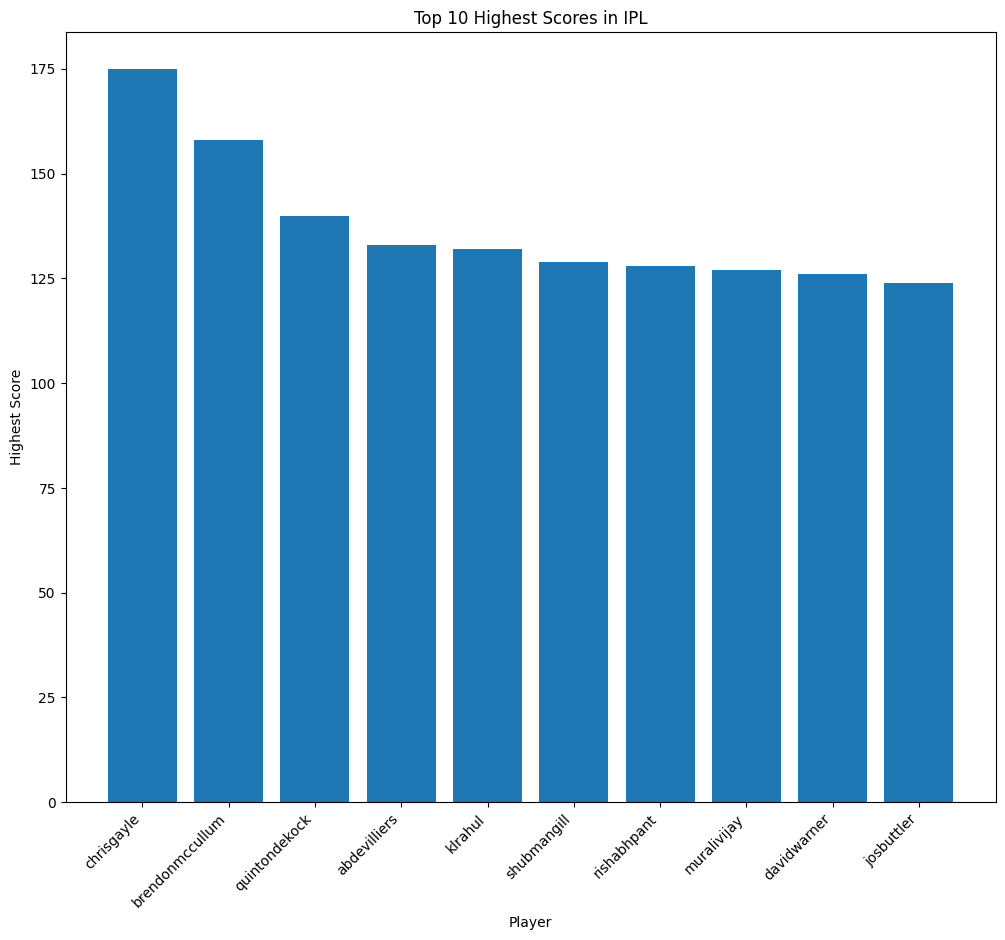

In [201]:
# Select the top 10 highest scores
top_10_highest_scores = Highest_score.head(10)

# Create a bar plot for the top 10 highest scores
plt.figure(figsize=(12, 10))
plt.bar(top_10_highest_scores['Unique'], top_10_highest_scores['HS'])
plt.title('Top 10 Highest Scores in IPL')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.xticks(rotation=45, ha='right')
plt.show()

##**Maximum Sixes**

In [202]:
maximum_six=df.groupby('Unique')['6s'].sum().sort_values(ascending=False).head(10)

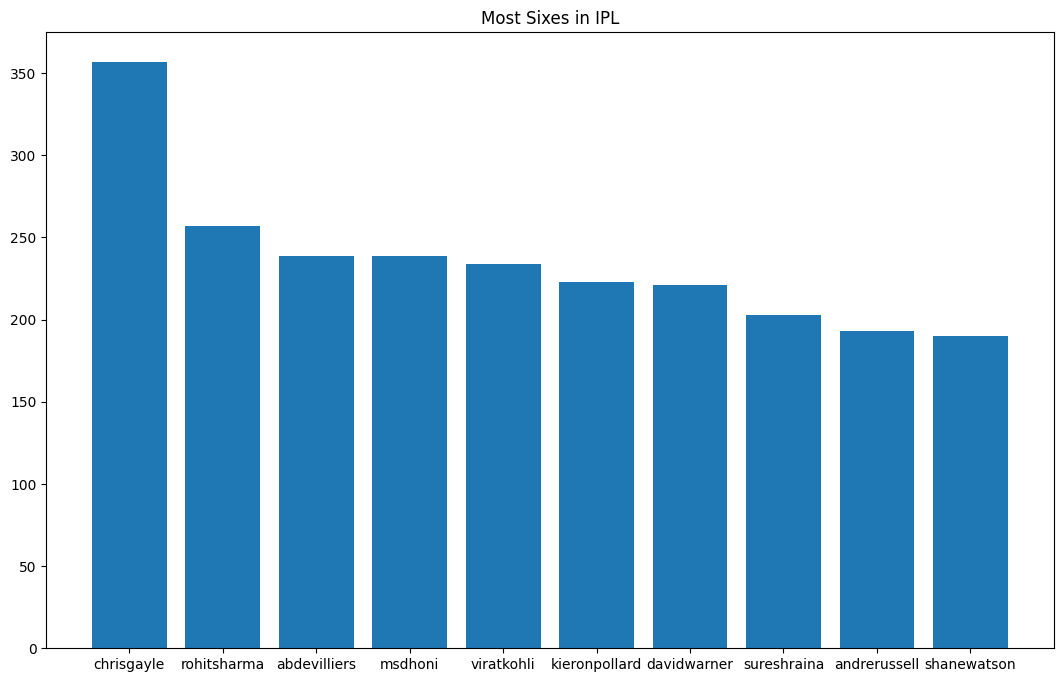

In [203]:
plt.figure(figsize=(13,8))
plt.bar(maximum_six.index,maximum_six.values)
plt.title("Most Sixes in IPL")
plt.show()

In [204]:
df.head(3)

,Postion,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year,Team,Unique
0,1,Shubman Gill,17,17,2,890,129,59.33,564,157.80,3,4,85,33,2023,GT,shubmangill
1,2,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,2023,RCB,fafduplessis
2,3,Devon Conway,16,15,2,672,92,51.69,481,139.70,0,6,77,18,2023,CSK,devonconway


##**Most Balls Faced**

In [205]:
ball_faced=df.groupby('Unique')['BF'].sum().sort_values(ascending=False).head(10)

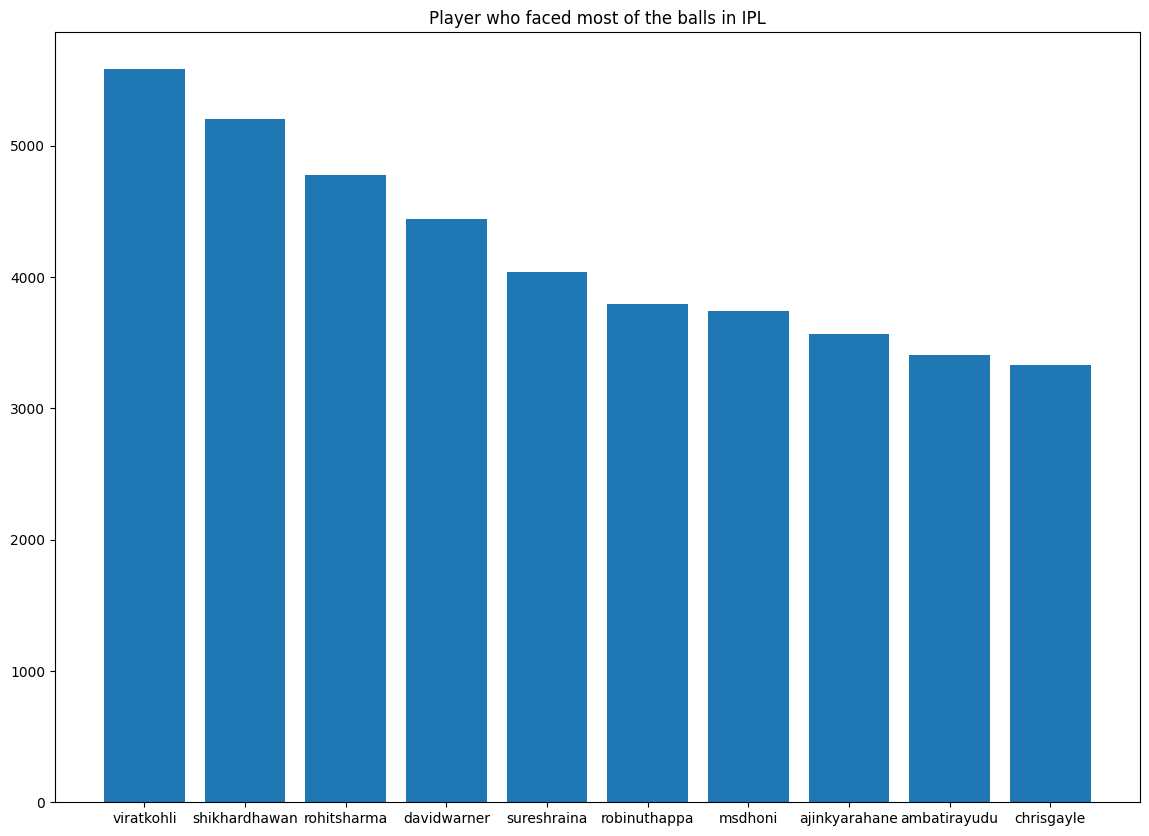

In [206]:
plt.figure(figsize=(14,10))
plt.bar(ball_faced.index,ball_faced.values)
plt.title("Player who faced most of the balls in IPL")
plt.show()

##**Most Number of Boundaries**

In [207]:
boundries=df[['6s','4s','Unique']]

In [208]:
boundries

,6s,4s,Unique
0,33,85,shubmangill
1,36,60,fafduplessis
2,18,77,devonconway
3,16,65,viratkohli
4,26,82,yashasvijaiswal
...,...,...,...
2336,0,0,paidikalvavijaykumar
2337,0,0,abdurrazzak
2338,0,0,abhinavmukund
2339,0,0,lakshmipathybalaji


In [209]:
df['boundries']=df['6s']+df['4s']

In [210]:
boundry=df.groupby('Unique')['boundries'].sum().sort_values(ascending=False).head(10)

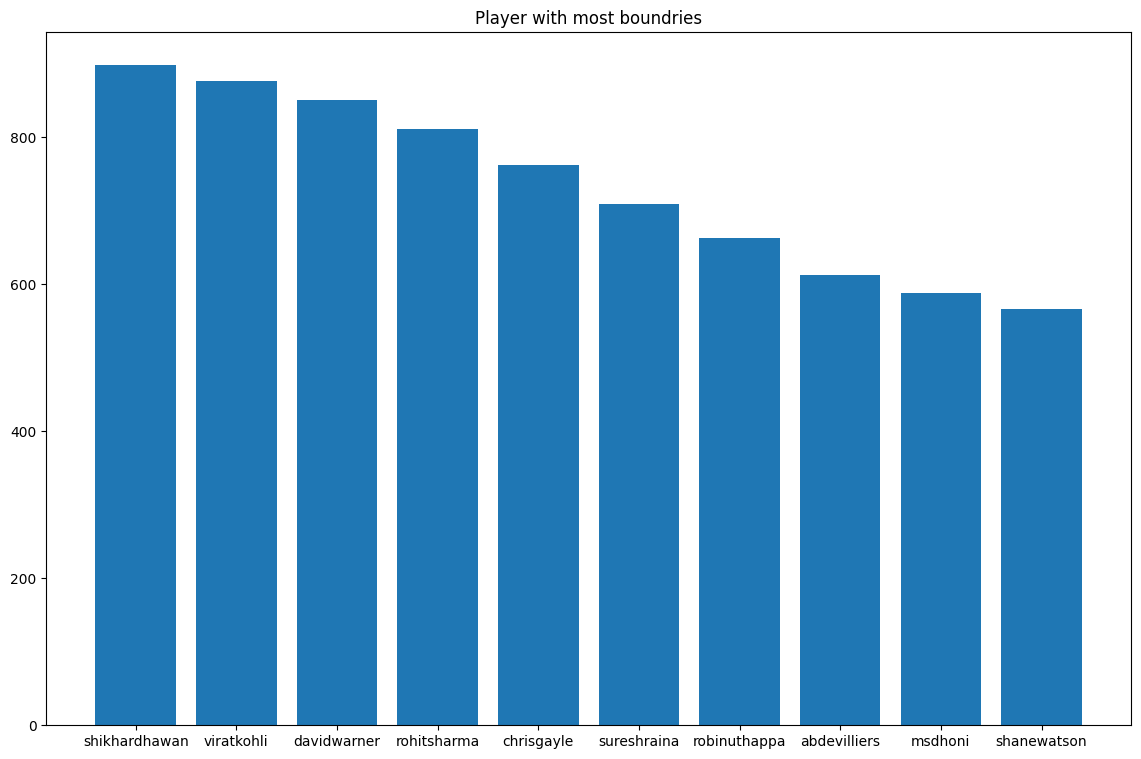

In [211]:
plt.figure(figsize=(14,9))
plt.bar(boundry.index,boundry.values)
plt.title("Player with most boundries")
plt.show()

##**Players played with most no. of teams**

In [212]:
player_team_count=df.groupby('Unique')['Team'].nunique().sort_values(ascending=False).head(10)

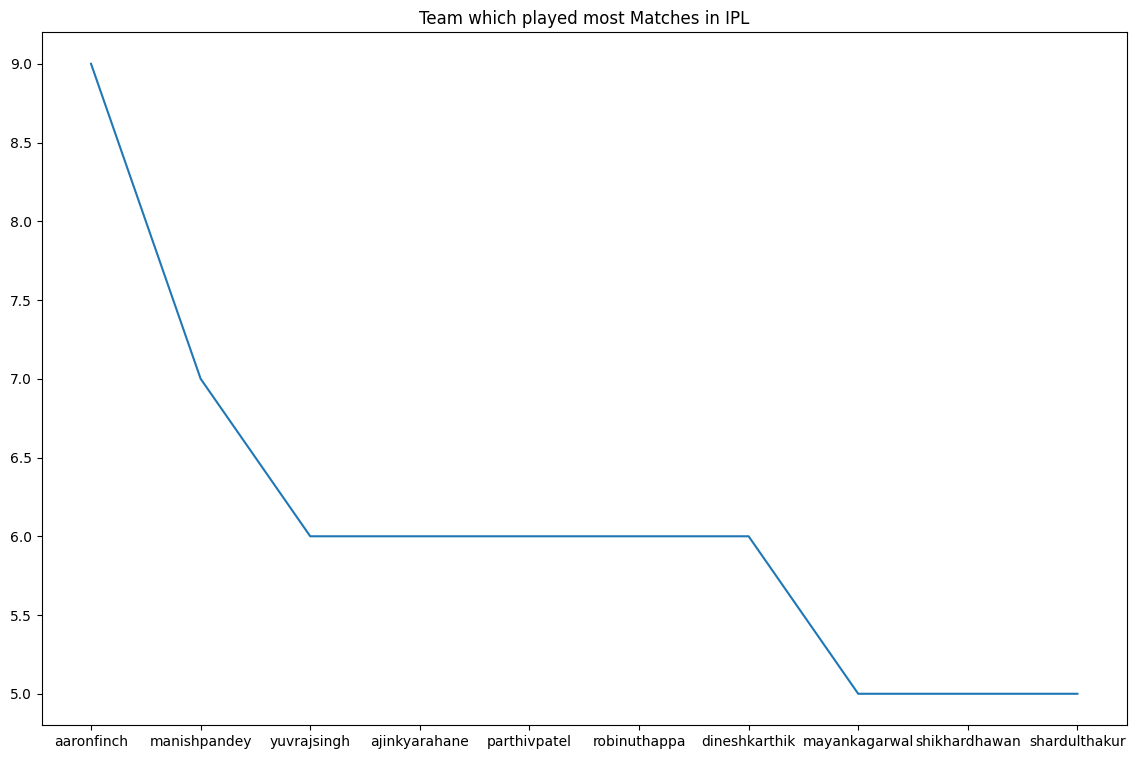

In [213]:
plt.figure(figsize=(14,9))
plt.plot(player_team_count.index,player_team_count.values)
plt.title("Team which played most Matches in IPL")
plt.show()

##**Highest Runs year-wise**

In [214]:
df.groupby('year')['Runs'].max().sort_values(ascending=False)

year
2016    973
2023    890
2022    863
2018    735
2012    733
2013    733
2019    692
2020    670
2014    660
2017    641
2021    635
2010    618
2008    616
2011    608
2009    572
2015    562
Name: Runs, dtype: int64